In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from itertools import combinations
from scipy.stats import linregress


#python -m pip install numpy scikit-learn statsmodels

In [2]:
lista_file = [
    "APPA_2_Parco S. Chiara.csv",
    "APPA_4_Via Bolzano.csv",
    "APPA_6_Rovereto.csv",
    "APPA_8_Borgo Valsugana.csv",
    "APPA_9_Riva del Garda.csv",
    "APPA_15_Monte Gaza.csv",
    "APPA_22_Piana Rotaliana.csv",
    "APPA_23_A22 (Avio).csv",
]



In [3]:
path = "..\\DataSet_APPA_TRENTO\\DataSet_APPA_(2013-2023)\\"
#start_date="01/01/2013"         #"dd/mm/yy"
#end_date="01/01/2023"           #"dd/mm/yy"




DATASET: APPA_2_Parco S. Chiara.csv


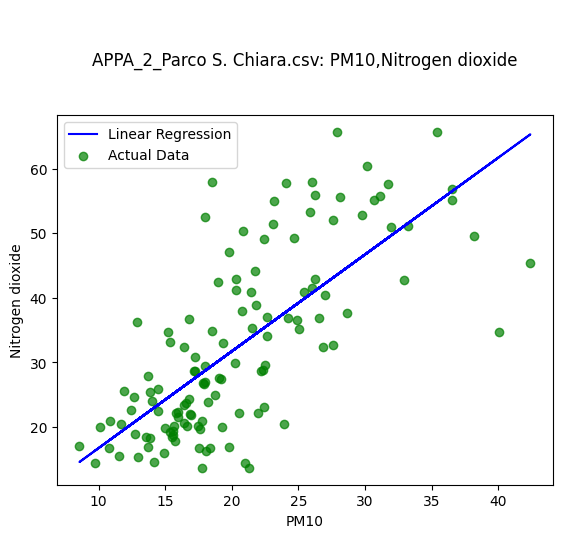

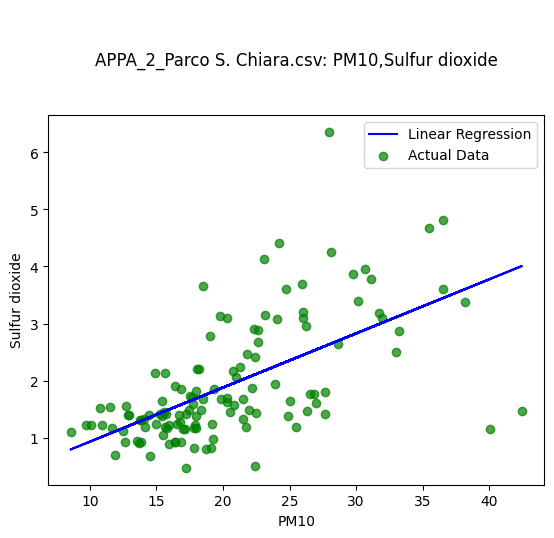

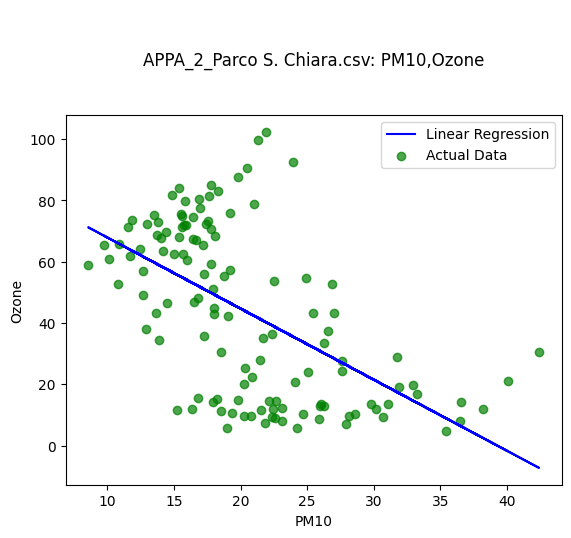

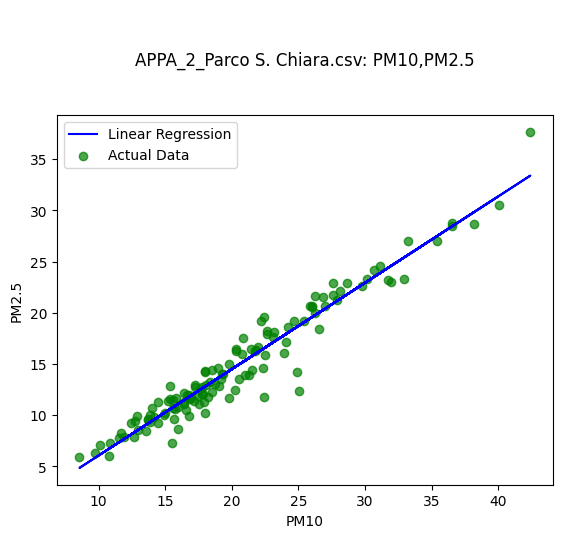

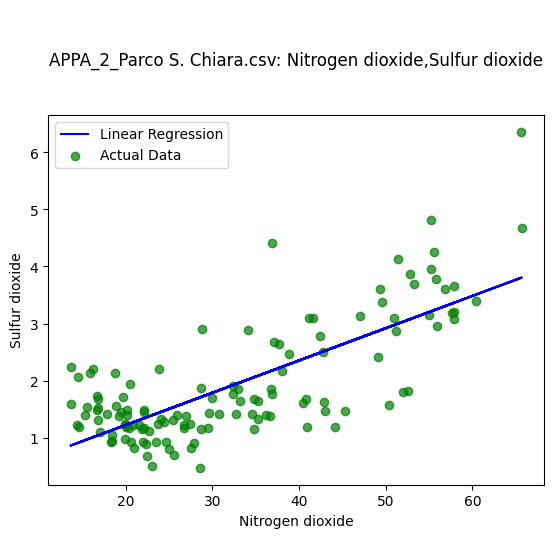

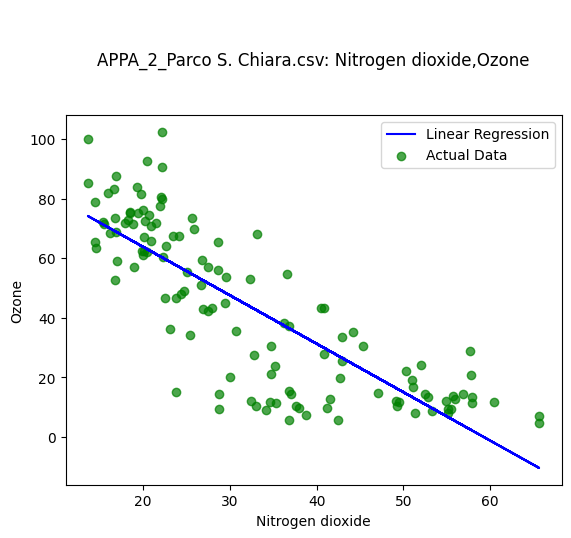

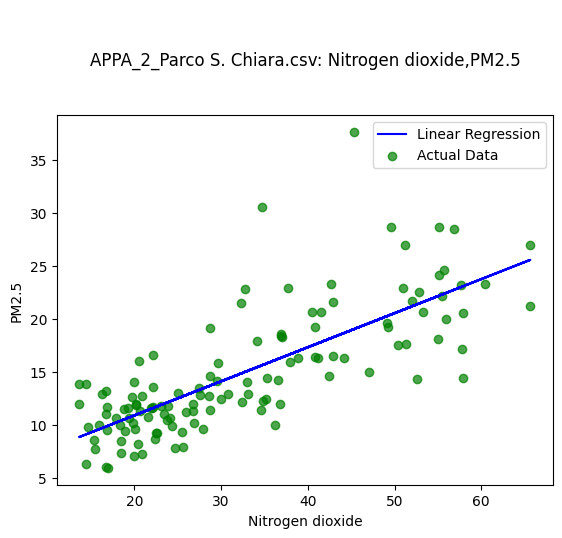

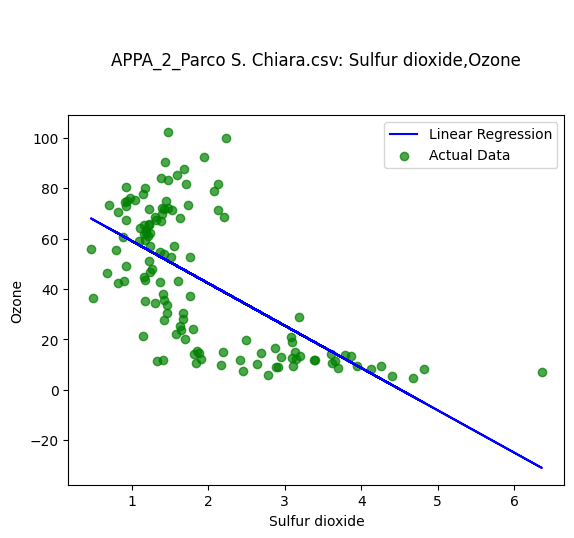

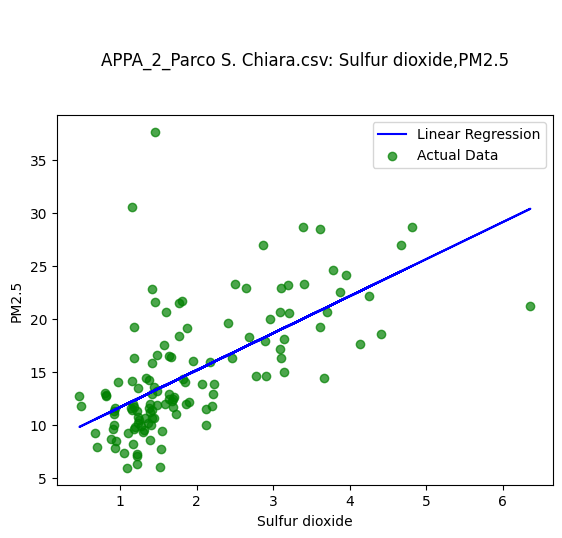

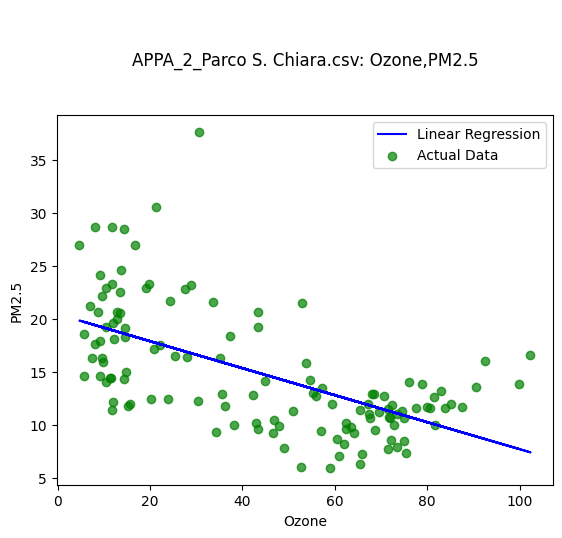



DATASET: APPA_4_Via Bolzano.csv


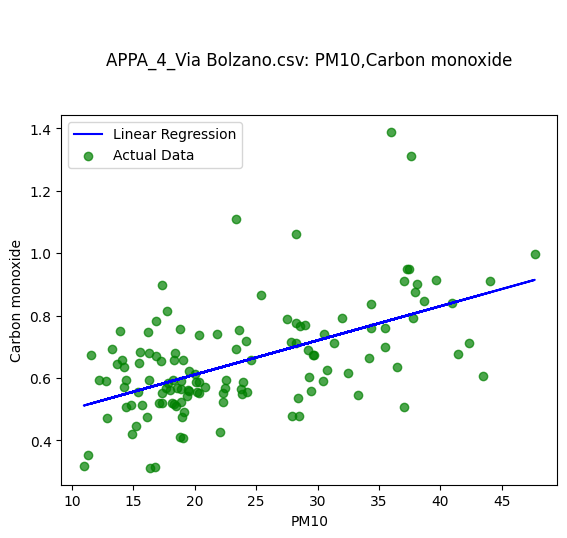

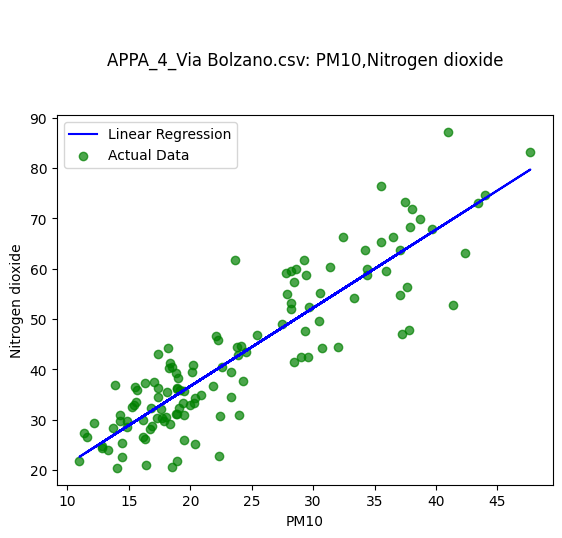

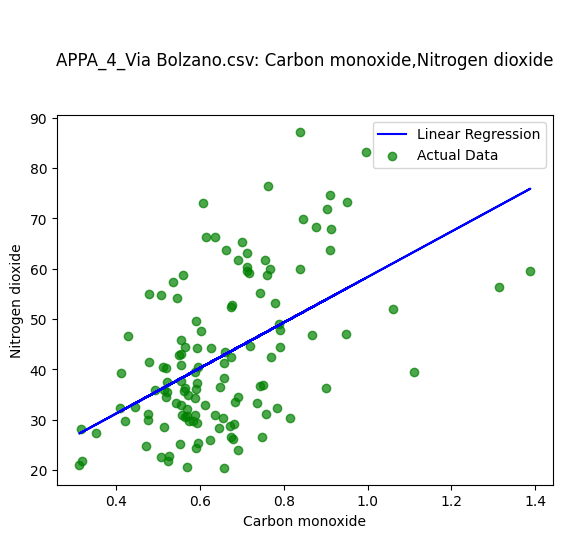



DATASET: APPA_6_Rovereto.csv


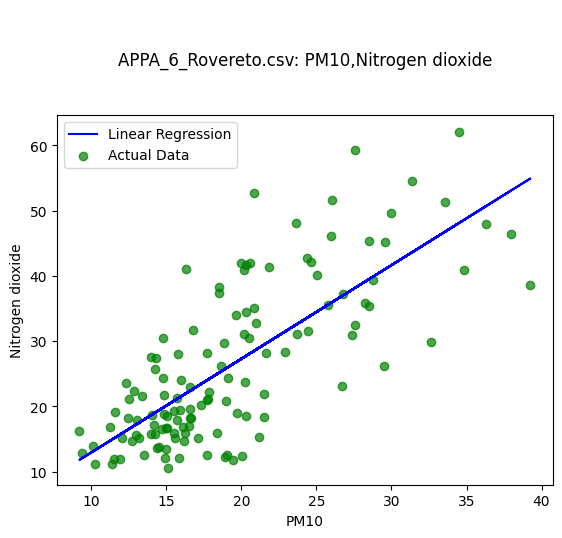

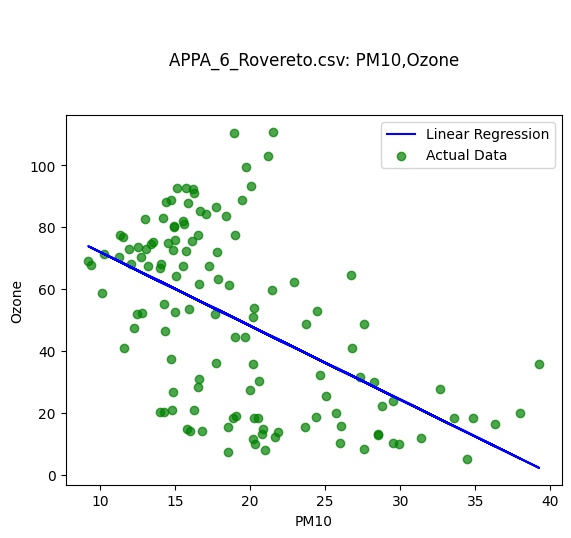

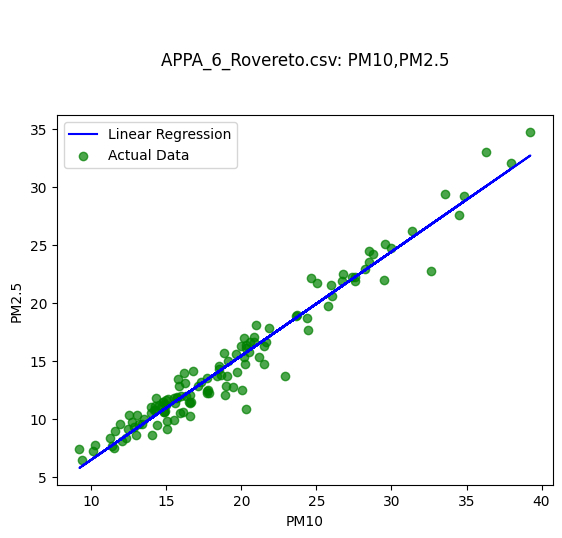

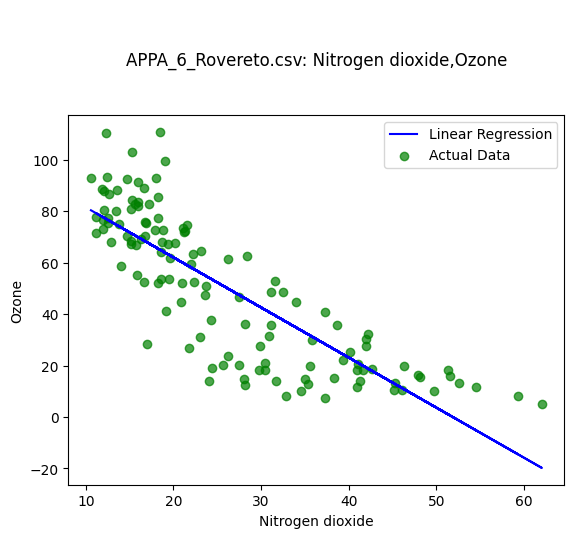

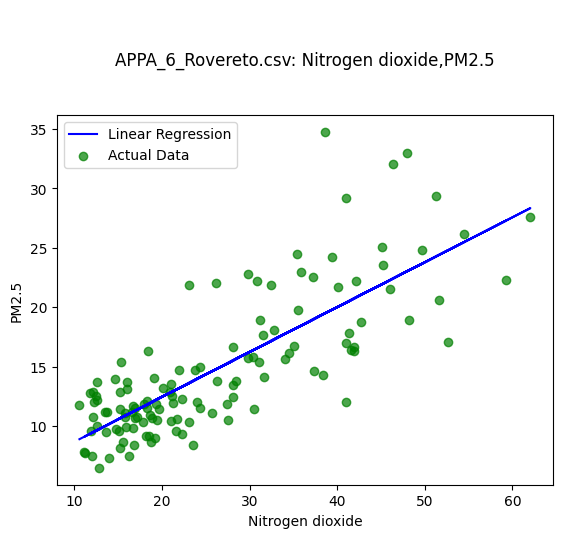

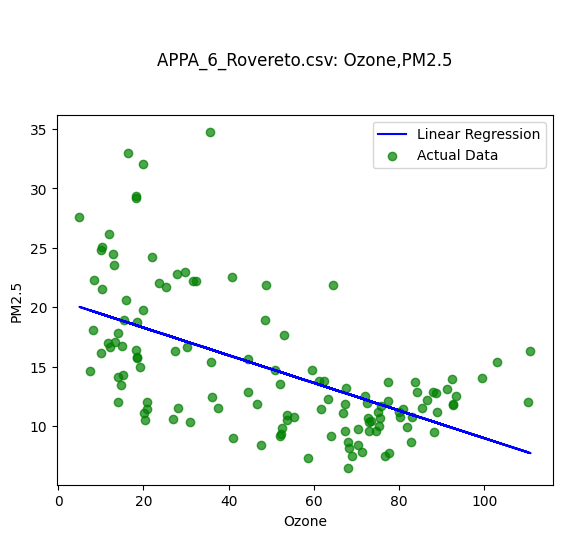



DATASET: APPA_8_Borgo Valsugana.csv


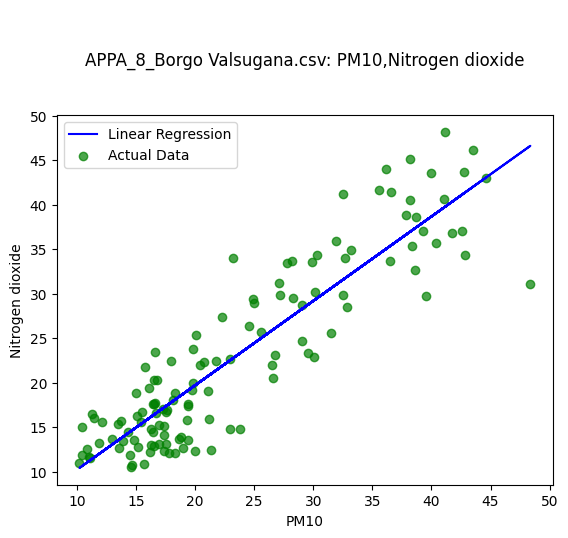

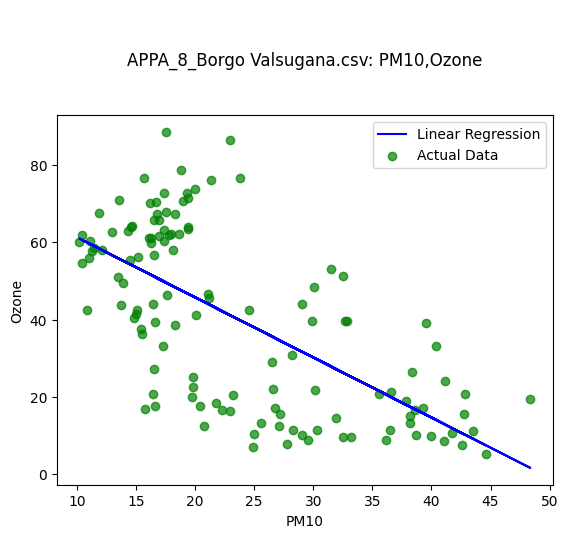

An exception occurred


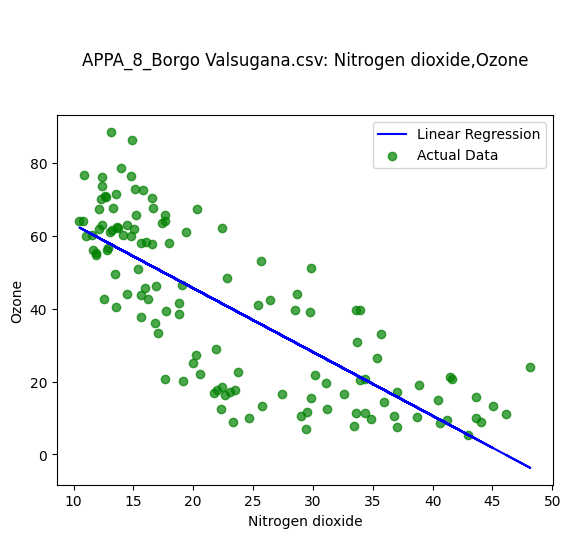

An exception occurred
An exception occurred


DATASET: APPA_9_Riva del Garda.csv


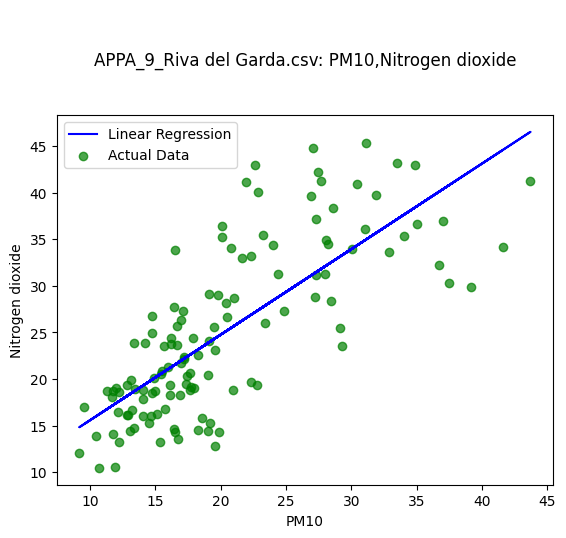

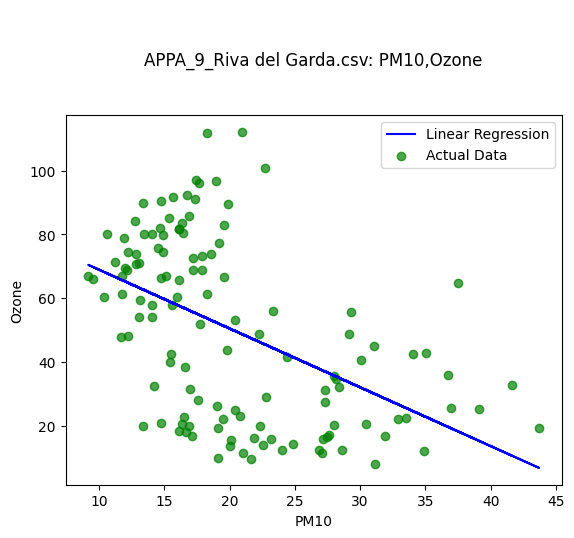

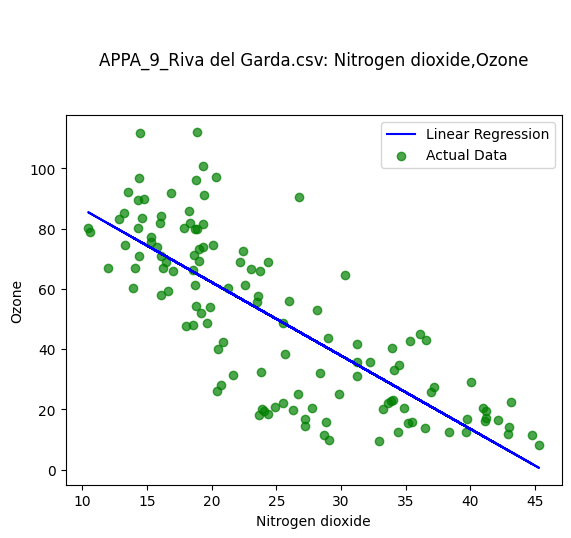



DATASET: APPA_15_Monte Gaza.csv


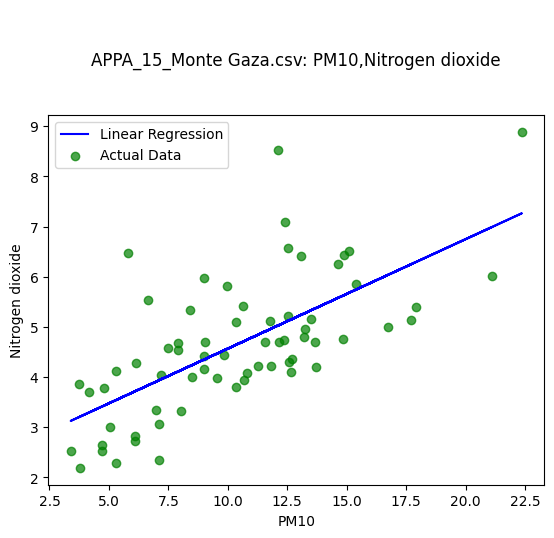

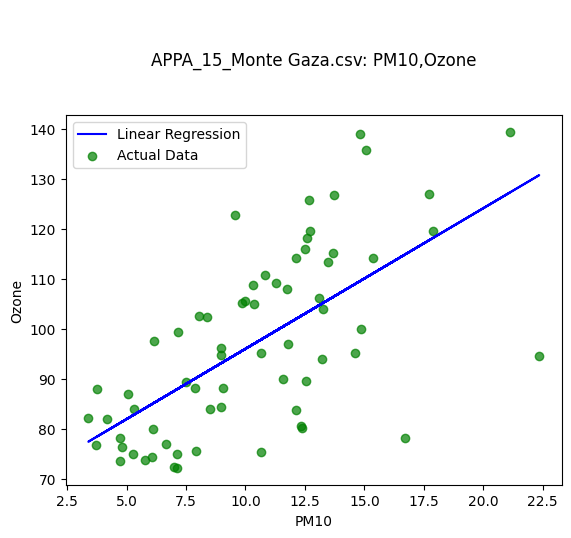

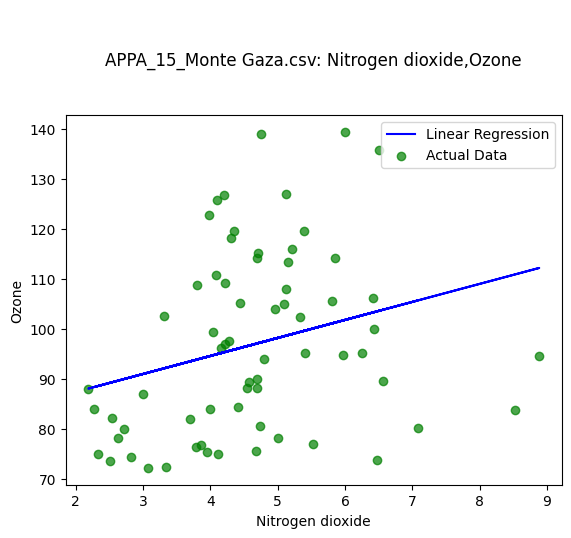



DATASET: APPA_22_Piana Rotaliana.csv
An exception occurred
An exception occurred


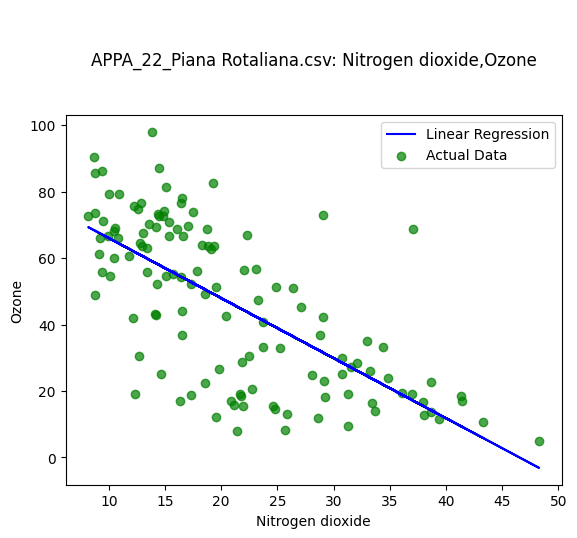



DATASET: APPA_23_A22 (Avio).csv
An exception occurred
An exception occurred


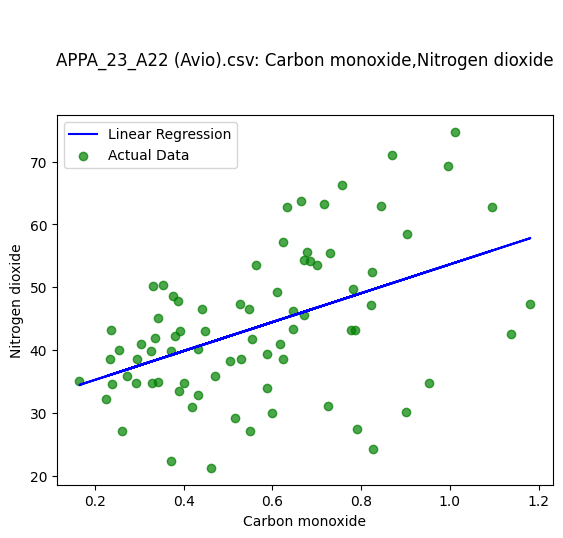

In [4]:
file=pd.DataFrame().to_csv("Regression_Table.csv")
regress_table=pd.DataFrame(columns=["Name: ","slope","intercept","rvalue","pvalue","stderr","intercept_stderr","Equation"])

regress_table.to_csv("Regression_Table.csv",mode="a")

station_list=[]
coppie=[]
for file in lista_file:
    Appa=pd.read_csv(
        path+file,
        na_values="n.d."
    )
    print("\n\nDATASET: "+file)
    
    gas_list=[Appa.columns.values]
    Appa["Data"]=pd.to_datetime(Appa["Data"])
    Appa.sort_values(by="Data", inplace=True)
    Appa=Appa.set_index("Data",drop=True)
    Appa = Appa.resample("M").mean()
    #Appa=Appa[start_date:end_date]
    
    station_list.clear()
    coppie.clear()
    for station in gas_list:
        station_list.append(station[1:])
        coppie.clear()
    
    for gas in station_list: 
        coppie=list(combinations(gas, 2))
        #print(coppie)
        
    for gas_1 , gas_2 in coppie:

        #print(gas_1+" + "+gas_2)
        LR =LinearRegression()
        try:
            LR.fit(Appa[gas_1].values.reshape(-1,1),Appa[gas_2].values)
            prediction = LR.predict(Appa[gas_1].values.reshape(-1,1))
            plt.plot(Appa[gas_1], prediction, label="Linear Regression", color="b")
            plt.scatter(Appa[gas_1],Appa[gas_2], label="Actual Data", color ="g", alpha=.7)
            plt.legend()
            plt.title("\n\n"+file+": "+gas_1+","+gas_2+"\n\n")
            plt.xlabel(gas_1)
            plt.ylabel(gas_2)
            plt.show()
            regress_info=linregress(Appa[gas_1], Appa[gas_2])
            eq="y = "+str(round(regress_info.slope,2))+"x + "+str(round(regress_info.intercept,2))
            data=[file+": "+gas_1+","+gas_2,regress_info.slope,regress_info.intercept,regress_info.rvalue,regress_info.pvalue,regress_info.stderr,regress_info.intercept_stderr,eq]
            regress_table.loc[len(regress_table.index)] =data
            regress_table.to_csv("Regression_Table.csv",mode="a",header=None)
            #regress_table.to_csv(mode="a")
            #print(regress_table)
        except:
            print("An exception occurred")
        
       


In [5]:
print(regress_table)

                                               Name:       slope   intercept  \
0   APPA_2_Parco S. Chiara.csv: PM10,Nitrogen dioxide   1.498414    1.735368   
1     APPA_2_Parco S. Chiara.csv: PM10,Sulfur dioxide   0.094975   -0.022684   
2              APPA_2_Parco S. Chiara.csv: PM10,Ozone  -2.318508   91.079503   
3              APPA_2_Parco S. Chiara.csv: PM10,PM2.5   0.843381   -2.378828   
4   APPA_2_Parco S. Chiara.csv: Nitrogen dioxide,S...   0.056618    0.086846   
5   APPA_2_Parco S. Chiara.csv: Nitrogen dioxide,O...  -1.623174   96.226235   
6   APPA_2_Parco S. Chiara.csv: Nitrogen dioxide,P...   0.321472    4.476252   
7    APPA_2_Parco S. Chiara.csv: Sulfur dioxide,Ozone -16.799970   75.881588   
8    APPA_2_Parco S. Chiara.csv: Sulfur dioxide,PM2.5   3.495138    8.182551   
9             APPA_2_Parco S. Chiara.csv: Ozone,PM2.5  -0.127423   20.457398   
10       APPA_4_Via Bolzano.csv: PM10,Carbon monoxide   0.010975    0.391388   
11      APPA_4_Via Bolzano.csv: PM10,Nit

In [6]:
#data=[regress_info.slope,regress_info.intercept,regress_info.rvalue,regress_info.pvalue,regress_info.stderr,regress_info.intercept_stderr]
#info=["slope","intercept","rvalue","pvalue","stderr","intercept_stderr"]

data=[regress_info.slope,regress_info.intercept,regress_info.rvalue]
info=["slope","intercept","rvalue"]

regress_table=pd.DataFrame(
    columns=["Name","slope","intercept","rvalue"]
)
regress_table


,Name,slope,intercept,rvalue


In [7]:
[gas_1, gas_2]

['Carbon monoxide', 'Nitrogen dioxide']

In [8]:
Appa[[gas_1, gas_2]]

,Carbon monoxide,Nitrogen dioxide
Data,,
2017-01-31,1.011687,74.717439
2017-02-28,1.094903,62.703313
2017-03-31,0.677297,55.618403
2017-04-30,0.387255,47.782913
2017-05-31,0.440508,46.592715
...,...,...
2023-02-28,1.181536,47.330189
2023-03-31,0.953575,34.709071
2023-04-30,0.901361,30.215420


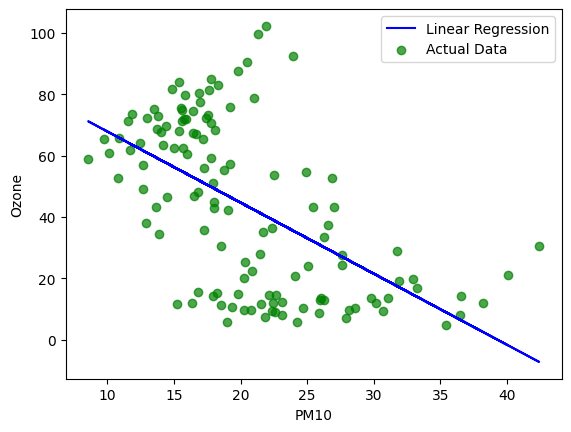

In [9]:
Appa=pd.read_csv(
    "..\\DataSet_APPA_TRENTO\\DataSet_APPA_(2013-2023)\\APPA_2_Parco S. Chiara.csv",
    na_values="n.d."
)

Appa["Data"] = pd.to_datetime(Appa["Data"])  # Convert "Data" column to DateTimeIndex

Appa.sort_values(by="Data", inplace=True)
Appa=Appa.set_index("Data",drop=True)
Appa = Appa.resample("M").mean()

LR =LinearRegression()
LR.fit(Appa["PM10"].values.reshape(-1,1),Appa["Ozone"].values)
prediction = LR.predict(Appa["PM10"].values.reshape(-1,1))
plt.plot(Appa["PM10"], prediction, label= "Linear Regression" , color="b")
plt.scatter(Appa["PM10"],Appa["Ozone"], label="Actual Data", color ="g", alpha=.7)
plt.legend()
plt.xlabel("PM10")
plt.ylabel("Ozone")
plt.show()

